In [58]:
import numpy as np
import pandas as pd 
import scipy as sp
import seaborn as sns 
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, LabelEncoder
from sklearn.pipeline import Pipeline
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(color_codes=True)
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

In [59]:
df=pd.read_csv("Heart_Disease_Prediction.csv")

In [60]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [61]:
df.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [62]:
df.size

3780

In [63]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [65]:
df.shape

(270, 14)

In [66]:
df.isnull()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,False,False,False,False,False,False,False,False,False,False,False,False,False,False
266,False,False,False,False,False,False,False,False,False,False,False,False,False,False
267,False,False,False,False,False,False,False,False,False,False,False,False,False,False
268,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [67]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

<AxesSubplot:>

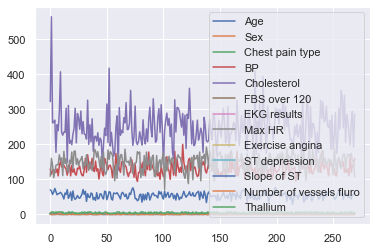

In [68]:
df.plot()

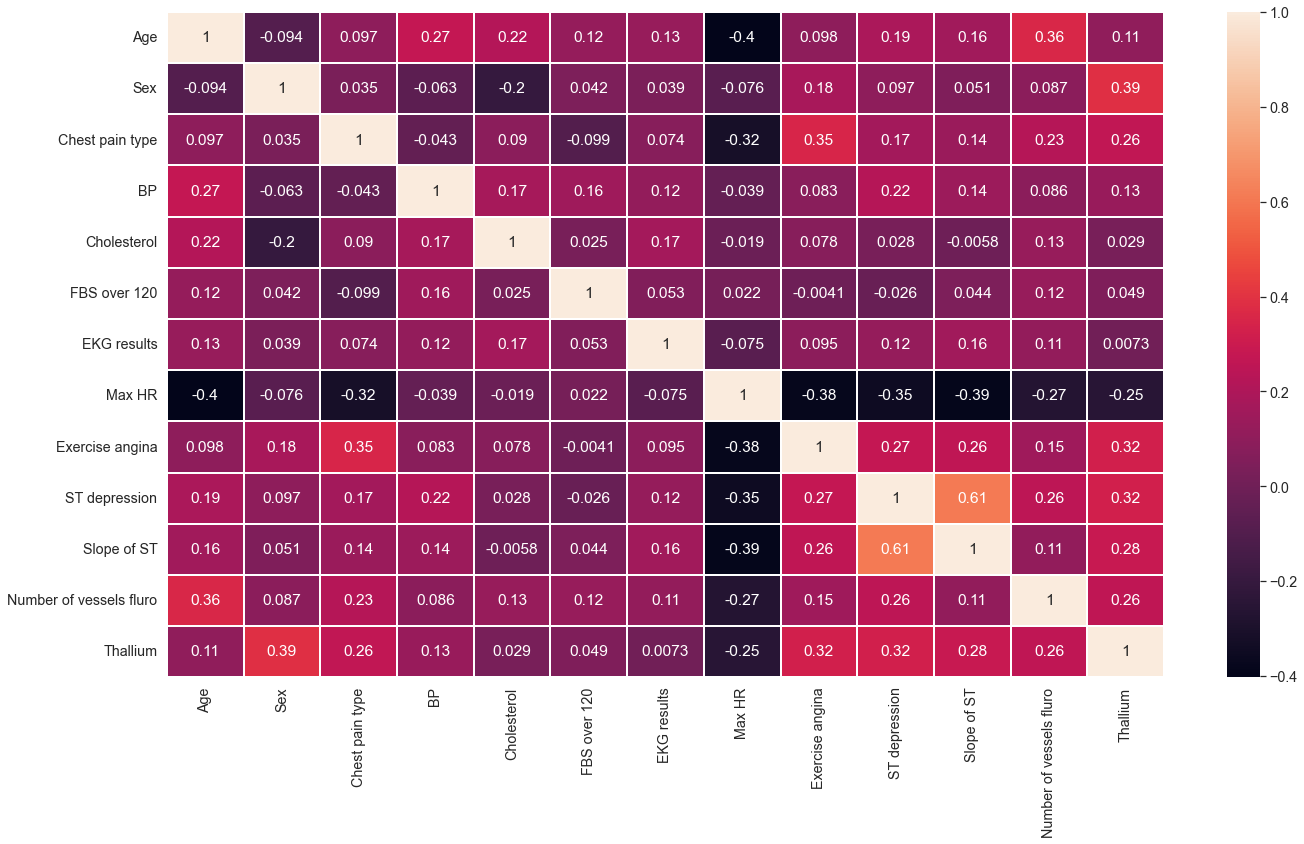

In [69]:
#It is always better to check the correlation between the features so that we can analyze(positive or Negative)
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(df.corr(),annot=True,linewidth =2)
plt.tight_layout()

In [70]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [71]:
x=df.drop(columns='Heart Disease',axis=1)
y=df['Heart Disease']

In [72]:
print(x)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [73]:
print(y)

0      Presence
1       Absence
2      Presence
3       Absence
4       Absence
         ...   
265     Absence
266     Absence
267     Absence
268     Absence
269    Presence
Name: Heart Disease, Length: 270, dtype: object


In [74]:
#Descision Tree Algorithm
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
dt=DecisionTreeClassifier(max_depth=6,random_state=1)
dt.fit(x_train,y_train) #takes the training data as arguments 
y_pred=dt.predict(x_test)
accuracy_for_descisiontree=accuracy_score(y_test,y_pred)*100
print("the accuracy for descisiontree: {:.1f}".format(accuracy_for_descisiontree))

the accuracy for descisiontree: 74.1


In [75]:
# #FRIST way 
# from sklearn.metrics import classification_report

In [76]:
# y_true = [0, 1, 2, 2, 2]
# y_pred = [0, 0, 2, 2, 1]
# target_names = ['class 0', 'class 1', 'class 2']
# print(classification_report(y_true, y_pred, target_names=target_names))

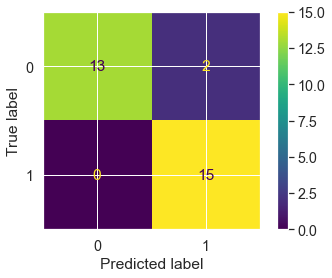

In [77]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x,y = make_classification(random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
clf = SVC(random_state=42)
clf.fit(x_train,y_train)
SVC(random_state=42)
plot_confusion_matrix(clf,x_test,y_test)  
plt.show()

In [78]:
#2ed KNN Algorithm
df["Heart Disease"]=df["Heart Disease"].map({'Absence':0,'Presence':1}).astype(int)
x=df.drop(columns='Heart Disease',axis=1)
y=df["Heart Disease"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
training_acc=[]
testing_acc=[]
k=range(1,100,2)
score=0
for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train) #takes the training data as arguments
y_pred_train=knn.predict(x_train)
training_acc.append(accuracy_score(y_train,y_pred_train))
y_pred_test=knn.predict(x_test)
acc=accuracy_score(y_pred_test,y_test)
acc=accuracy_score(y_pred_test,y_test)*100
if score<acc:
 score=acc
 best_k=i
print(i)
print(score)
print(acc)

99
60.49382716049383
60.49382716049383


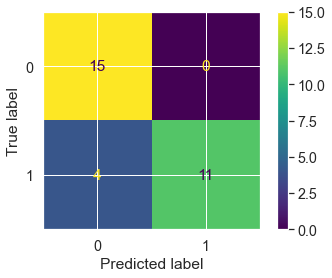

In [79]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x,y = make_classification(random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
clf = SVC(random_state=1)
clf.fit(x_train,y_train)
SVC(random_state=1)
plot_confusion_matrix(clf,x_test,y_test)  
plt.show()

In [80]:
##### perciptron
x=df.drop(columns='Heart Disease',axis=1)
y=df["Heart Disease"]
class_le=LabelEncoder()
y=class_le.fit_transform(df['Heart Disease'].values)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.32)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
scaler=StandardScaler()

print('\nData preprocessing with {scaler}\n'.format(scaler=scaler))

x_train_scaler=scaler.fit_transform(x_train)
x_test_scaler=scaler.transform(x_test)
mlp=MLPClassifier(
    max_iter=1000,
    alpha=0.1,
    

    random_state=42
)
mlp.fit(x_train_scaler,y_train )

mlp_predict = mlp.predict(x_test_scaler)
MLP_Accuracy=accuracy_score(y_test, mlp_predict) * 100
print('MLP_Accuracy: {:.2f}%'.format(accuracy_score(y_test, mlp_predict) * 100))

(183, 13) (183,)
(87, 13) (87,)

Data preprocessing with StandardScaler()

MLP_Accuracy: 81.61%


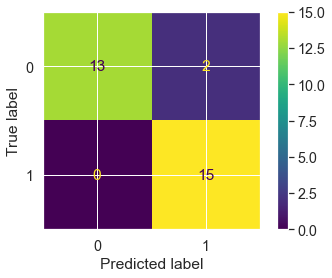

In [81]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x,y = make_classification(random_state=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
clf = SVC(random_state=42)
clf.fit(x_train,y_train)
SVC(random_state=42)
plot_confusion_matrix(clf,x_test,y_test)  
plt.show()

In [82]:
#Bonus Reinforcement Learing
x=df.drop(columns='Heart Disease',axis=1)
y=df['Heart Disease']

#Bonus Reinforcement learing
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(color_codes=True)
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets
# Using Random forest classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
Accuracy_of_Random_Forest_Classifier=metrics.accuracy_score(y_test, y_pred_rf)*100
print("Accuracy of Random Forest Classifier :: ", metrics.accuracy_score(y_test, y_pred_rf)*100)

Accuracy of Random Forest Classifier ::  93.33333333333333


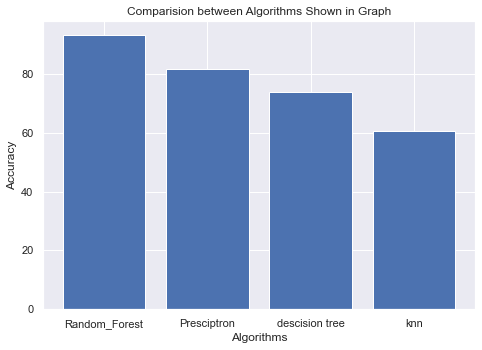

In [83]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([1,1,1,1])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparision between Algorithms Shown in Graph")
Algorithms=['Random_Forest','Presciptron', 'descision tree', 'knn']
Accuracy=[Accuracy_of_Random_Forest_Classifier,MLP_Accuracy,accuracy_for_descisiontree,acc]
ax.bar(Algorithms,Accuracy)
plt.show()